In [98]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [99]:
# Cargaremos el archivo Excel modificado que el usuario acaba de subir
file_path_excel_modificado = 'dataset_empleados.xlsx'

In [100]:
# Utilizamos Pandas para cargar el archivo Excel modificado
df_empleados_excel_modificado = pd.read_excel(file_path_excel_modificado)

# Mostrar las primeras filas del DataFrame modificado para verificar su carga
df_empleados_excel_modificado.head()

,ID,Genero,Nivel_Educacion,Edad,Experiencia_Laboral,Especializacion,Lenguajes_Programacion,Tipo_Empresa,Ubicacion_Geografica,Salario,Horas_Trabajo,Proyectos_Actuales
0,1,Masculino,Licenciatura,28,6,Desarrollo Web,"JavaScript, HTML, CSS",Startup,"Nueva York, EE. UU.",60000,40,Aplicación Móvil
1,2,Femenino,Maestría,35,10,Seguridad,"Python, C++, Java",Corporación,"San Francisco, EE. UU.",80000,45,Análisis de Datos
2,3,Masculino,Licenciatura,26,4,Desarrollo Móvil,"Swift, Java",Startup,"Londres, Reino Unido",55000,42,Juegos en Línea
3,4,Femenino,Doctorado,40,15,Inteligencia Artificial,"Python, R",Startup,"Toronto, Canadá",95000,50,Robótica
4,5,No Binario,Licenciatura,30,7,Análisis de Datos,"SQL, R",Agencia,"Washington, D.C., EE. UU.",62000,38,Ciberseguridad


In [101]:
# Calculamos el promedio de edad y experiencia laboral separados por género
promedios_por_genero = df_empleados_excel_modificado.groupby('Genero').agg({
    'Edad': 'mean',
    'Experiencia_Laboral': 'mean'
})

promedios_por_genero


,Edad,Experiencia_Laboral
Genero,,
Femenino,36.608696,11.434783
Masculino,31.157895,7.315789
No Binario,31.857143,7.857143


In [102]:
# Extraemos la columna de horas de trabajo del DataFrame modificado
horas_trabajo_modificado = df_empleados_excel_modificado['Horas_Trabajo']

# Calculamos la media y la desviación estándar de las horas de trabajo
media_horas_modificado = np.mean(horas_trabajo_modificado)
std_horas_modificado = np.std(horas_trabajo_modificado, ddof=1)  # ddof=1 para muestra

# Número de observaciones
n_modificado = len(horas_trabajo_modificado)

# Calculamos el intervalo de confianza del 95% para la media
confianza = 0.95
sem_modificado = std_horas_modificado / np.sqrt(n_modificado)  # Error estándar de la media
intervalo_confianza_modificado = stats.t.interval(confianza, df=n_modificado-1, loc=media_horas_modificado, scale=sem_modificado)


print("intervalo de confianza sobre las horas de trabajo",intervalo_confianza_modificado)


intervalo de confianza sobre las horas de trabajo (42.54906633573436, 44.675423460184014)


In [103]:
# Preparación de los datos para el modelo de regresión lineal
X = df_empleados_excel_modificado['Edad']  # Variable independiente
y = df_empleados_excel_modificado['Salario']  # Variable dependiente

# Agregar una constante a la variable independiente
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Obtener el resumen del modelo
resumen_modelo = modelo.summary()
resumen_modelo


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Salario   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     304.3
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.67e-22
Time:                        09:30:49   Log-Likelihood:                -481.86
No. Observations:                  49   AIC:                             967.7
Df Residuals:                      47   BIC:                             971.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.037e+04   4901.931     -2.115      0.040   -2.02e+04    -507.158
Edad        2505.7695    143.644     17.444      0.000    2216.795    2794.744
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   2.754
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                1.099
Skew:                           0.247   Prob(JB):                        0.577
Kurtosis:                       2.458   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

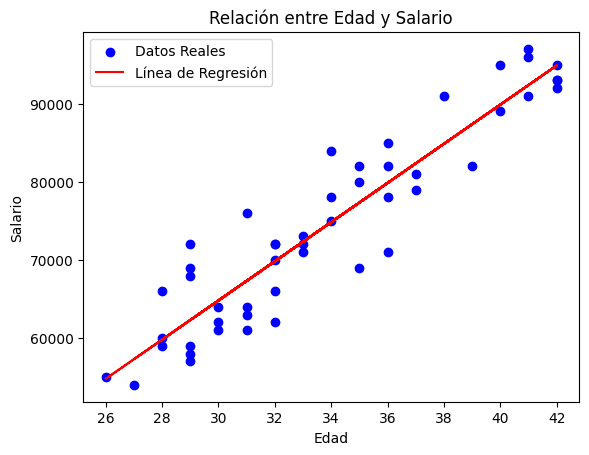

In [104]:
# Obtenemos los valores de la edad y los salarios predichos por el modelo
X_valores = df_empleados_excel_modificado['Edad']
y_pred = modelo.predict()

# Gráfico de dispersión de los datos reales
plt.scatter(X_valores, y, label='Datos Reales', color='blue')

# Línea de tendencia del modelo de regresión
plt.plot(X_valores, y_pred, label='Línea de Regresión', color='red')

# Etiquetas y leyenda
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.legend()

# Mostrar el gráfico
plt.show()


In [112]:
# Calculamos el coeficiente de correlación de Pearson entre la edad y el salario
coef_correlacion = df_empleados_excel_modificado['Edad'].corr(df_empleados_excel_modificado['Salario'])

print("Correlacion edad y salario:", coef_correlacion)

Correlacion edad y salario: 0.930705317724075
